## Capstone Project Notebook 03/02/2026 Function 4 Week 2##
### 4D Optimization - The Ultimate Challenge!
### Goal: MAXIMIZE the objective function (find least negative value)

In [1]:
# Section 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
from scipy.stats import norm
from scipy.optimize import minimize

## Load Updated Dataset (Week 2)
F4 is a **4D problem** - the most challenging yet!

In [2]:
# Load the updated dataset
INPUT_FILE = 'f4_w2_inputs.npy'   # Shape (31, 4)
OUTPUT_FILE = 'f4_w2_outputs.npy' # Shape (31,)

In [3]:
X = np.load(INPUT_FILE)  # 4D inputs
Y = np.load(OUTPUT_FILE) # Outputs

In [4]:
# Display data summary
print(f"Input data shape: {X.shape}")
print(f"Output data shape: {Y.shape}")
print(f"\nFirst 3 input points:\n{X[:3]}")
print(f"\nFirst 3 output values:\n{Y[:3]}")

Input data shape: (31, 4)
Output data shape: (31,)

First 3 input points:
[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]]

First 3 output values:
[-22.10828779 -14.60139663 -11.69993246]


In [5]:
print(f"Loaded {X.shape[0]} points in {X.shape[1]}D (4D problem - HARD!)")
print(f"Current best (MAXIMUM/least negative): {Y.max():.6f} at {X[Y.argmax()]}")
print(f"Note: We're MAXIMIZING - finding the least negative value!")
X = np.atleast_2d(X)
Y = Y.ravel()

Loaded 31 points in 4D (4D problem - HARD!)
Current best (MAXIMUM/least negative): -2.627068 at [0.414086 0.477129 0.465693 0.474096]
Note: We're MAXIMIZING - finding the least negative value!


## Data Analysis

In [6]:
print("="*70)
print("F4 DATASET ANALYSIS (4D)")
print("="*70)
print(f"\nInput ranges:")
print(f"  X1: [{X[:, 0].min():.4f}, {X[:, 0].max():.4f}]")
print(f"  X2: [{X[:, 1].min():.4f}, {X[:, 1].max():.4f}]")
print(f"  X3: [{X[:, 2].min():.4f}, {X[:, 2].max():.4f}]")
print(f"  X4: [{X[:, 3].min():.4f}, {X[:, 3].max():.4f}]")

print(f"\nOutput statistics:")
print(f"  Best (least negative): {Y.max():.6f}")
print(f"  Worst (most negative): {Y.min():.6f}")
print(f"  Mean:                  {Y.mean():.6f}")
print(f"  Median:                {np.median(Y):.6f}")
print(f"  Std:                   {Y.std():.6f}")

# Find best point
best_idx = np.argmax(Y)
print(f"\n🎯 BEST POINT SO FAR (LEAST NEGATIVE):")
print(f"  Input:  X1={X[best_idx, 0]:.6f}, X2={X[best_idx, 1]:.6f}")
print(f"          X3={X[best_idx, 2]:.6f}, X4={X[best_idx, 3]:.6f}")
print(f"  Output: {Y[best_idx]:.6f}")

# Show top 10 points
sorted_indices = np.argsort(Y)[::-1]
print(f"\n📊 TOP 10 POINTS (least negative):")
for i in range(min(10, len(Y))):
    idx = sorted_indices[i]
    marker = "⭐" if idx == best_idx else "  "
    print(f"{marker} {i+1:2d}. X=[{X[idx, 0]:.3f}, {X[idx, 1]:.3f}, {X[idx, 2]:.3f}, {X[idx, 3]:.3f}] → Y={Y[idx]:.3f}")

F4 DATASET ANALYSIS (4D)

Input ranges:
  X1: [0.0378, 0.9856]
  X2: [0.0063, 0.9196]
  X3: [0.0422, 0.9392]
  X4: [0.0815, 0.9995]

Output statistics:
  Best (least negative): -2.627068
  Worst (most negative): -32.625660
  Mean:                  -16.767248
  Median:                -16.026400
  Std:                   7.370764

🎯 BEST POINT SO FAR (LEAST NEGATIVE):
  Input:  X1=0.414086, X2=0.477129
          X3=0.465693, X4=0.474096
  Output: -2.627068

📊 TOP 10 POINTS (least negative):
⭐  1. X=[0.414, 0.477, 0.466, 0.474] → Y=-2.627
    2. X=[0.578, 0.429, 0.426, 0.249] → Y=-4.026
    3. X=[0.326, 0.472, 0.453, 0.106] → Y=-6.702
    4. X=[0.282, 0.506, 0.531, 0.096] → Y=-7.967
    5. X=[0.125, 0.130, 0.384, 0.287] → Y=-10.070
    6. X=[0.170, 0.757, 0.277, 0.531] → Y=-11.566
    7. X=[0.251, 0.034, 0.145, 0.495] → Y=-11.700
    8. X=[0.248, 0.060, 0.042, 0.441] → Y=-12.682
    9. X=[0.626, 0.587, 0.439, 0.779] → Y=-12.742
   10. X=[0.217, 0.166, 0.241, 0.770] → Y=-12.758


## Section 2: Fit Gaussian Process Surrogate Model

In [7]:
# Kernel for 4D problem
kernel = ConstantKernel(1.0, constant_value_bounds=(1e-3, 1e3)) * \
         Matern(length_scale=0.5, length_scale_bounds=(0.01, 10.0), nu=2.5) + \
         WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-095, 1e-1))

In [8]:
gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=30,
    normalize_y=True,
    random_state=42
)

In [9]:
# Fit the GP model
gp.fit(X, Y)
print(f"GP fitted. Learned kernel: {gp.kernel_}")

GP fitted. Learned kernel: 4.26**2 * Matern(length_scale=1.86, nu=2.5) + WhiteKernel(noise_level=6.42e-27)


## Section 3: Define Acquisition Functions
**Configured for MAXIMIZATION (finding least negative)**

In [10]:
def expected_improvement(X_new, gp, y_best, xi=0.01):
    """EI for maximization"""
    mu, sigma = gp.predict(X_new, return_std=True)
    sigma = np.maximum(sigma, 1e-9)
    imp = mu - y_best - xi
    Z = imp / sigma
    ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    ei[sigma < 1e-9] = 0.0
    return ei

def upper_confidence_bound(X_new, gp, kappa=2.0):
    """UCB for maximization"""
    mu, sigma = gp.predict(X_new, return_std=True)
    return mu + kappa * sigma

## Section 4: Optimize Acquisition Functions
Using many random restarts for 4D problem

In [11]:
# Define search bounds (4D)
bounds = [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]

# Current best value
y_best = Y.max()

print("="*70)
print("OPTIMIZING EXPECTED IMPROVEMENT (EI)")
print("="*70)

def neg_ei(x):
    return -expected_improvement(x.reshape(1, -1), gp, y_best, xi=0.01)[0]

best_ei = np.inf
x_next_ei = None

# Many restarts for 4D!
for i in range(75):
    x0 = np.array([np.random.uniform(b[0], b[1]) for b in bounds])
    result = minimize(neg_ei, x0, bounds=bounds, method='L-BFGS-B')
    
    if result.fun < best_ei:
        best_ei = result.fun
        x_next_ei = result.x

mu_ei, sigma_ei = gp.predict(x_next_ei.reshape(1, -1), return_std=True)

print(f"EI suggests:")
print(f"  X1={x_next_ei[0]:.6f}, X2={x_next_ei[1]:.6f}")
print(f"  X3={x_next_ei[2]:.6f}, X4={x_next_ei[3]:.6f}")
print(f"Predicted value: {mu_ei[0]:.6f} ± {sigma_ei[0]:.6f}")
print(f"Expected Improvement: {-best_ei:.6f}")

OPTIMIZING EXPECTED IMPROVEMENT (EI)
EI suggests:
  X1=0.439247, X2=0.414995
  X3=0.384687, X4=0.397917
Predicted value: -1.677777 ± 0.356982
Expected Improvement: 0.939764


In [12]:
print("\n" + "="*70)
print("OPTIMIZING UPPER CONFIDENCE BOUND (UCB)")
print("="*70)

kappa = 2.0

def neg_ucb(x):
    return -upper_confidence_bound(x.reshape(1, -1), gp, kappa)[0]

best_ucb = np.inf
x_next_ucb = None

for i in range(75):
    x0 = np.array([np.random.uniform(b[0], b[1]) for b in bounds])
    result = minimize(neg_ucb, x0, bounds=bounds, method='L-BFGS-B')
    
    if result.fun < best_ucb:
        best_ucb = result.fun
        x_next_ucb = result.x

mu_ucb, sigma_ucb = gp.predict(x_next_ucb.reshape(1, -1), return_std=True)

print(f"UCB suggests:")
print(f"  X1={x_next_ucb[0]:.6f}, X2={x_next_ucb[1]:.6f}")
print(f"  X3={x_next_ucb[2]:.6f}, X4={x_next_ucb[3]:.6f}")
print(f"Predicted value: {mu_ucb[0]:.6f} ± {sigma_ucb[0]:.6f}")
print(f"UCB value: {-best_ucb:.6f}")


OPTIMIZING UPPER CONFIDENCE BOUND (UCB)
UCB suggests:
  X1=0.441275, X2=0.400273
  X3=0.312748, X4=0.413822
Predicted value: -1.965250 ± 0.625982
UCB value: -0.713286


## Section 5: Local Refinement Strategy

In [13]:
print("\n" + "="*70)
print("LOCAL REFINEMENT - Points near current best")
print("="*70)

best_idx = np.argmax(Y)
best_point = X[best_idx]

step_size = 0.05
# Test each dimension ±step
local_points = [
    [best_point[0] - step_size, best_point[1], best_point[2], best_point[3]],
    [best_point[0] + step_size, best_point[1], best_point[2], best_point[3]],
    [best_point[0], best_point[1] - step_size, best_point[2], best_point[3]],
    [best_point[0], best_point[1] + step_size, best_point[2], best_point[3]],
    [best_point[0], best_point[1], best_point[2] - step_size, best_point[3]],
    [best_point[0], best_point[1], best_point[2] + step_size, best_point[3]],
    [best_point[0], best_point[1], best_point[2], best_point[3] - step_size],
    [best_point[0], best_point[1], best_point[2], best_point[3] + step_size],
]

print(f"Current best: [{best_point[0]:.4f}, {best_point[1]:.4f}, {best_point[2]:.4f}, {best_point[3]:.4f}]")
print(f"Value: {Y[best_idx]:.6f}\n")

best_local_pred = -np.inf
best_local_point = None
dim_names = ['X1', 'X2', 'X3', 'X4']

for i, lp in enumerate(local_points):
    if all(bounds[j][0] <= lp[j] <= bounds[j][1] for j in range(4)):
        mu, std = gp.predict(np.array(lp).reshape(1, -1), return_std=True)
        dim_idx = i // 2
        direction = '+' if i % 2 == 1 else '-'
        print(f"  {dim_names[dim_idx]}{direction}: [{lp[0]:.3f}, {lp[1]:.3f}, {lp[2]:.3f}, {lp[3]:.3f}] → {mu[0]:.3f} ± {std[0]:.3f}")
        
        if mu[0] > best_local_pred:
            best_local_pred = mu[0]
            best_local_point = lp

if best_local_point:
    print(f"\nBest local: [{best_local_point[0]:.6f}, {best_local_point[1]:.6f}, {best_local_point[2]:.6f}, {best_local_point[3]:.6f}]")
    print(f"Predicted: {best_local_pred:.6f}")


LOCAL REFINEMENT - Points near current best
Current best: [0.4141, 0.4771, 0.4657, 0.4741]
Value: -2.627068

  X1-: [0.364, 0.477, 0.466, 0.474] → -2.832 ± 0.149
  X1+: [0.464, 0.477, 0.466, 0.474] → -2.678 ± 0.127
  X2-: [0.414, 0.427, 0.466, 0.474] → -2.413 ± 0.179
  X2+: [0.414, 0.527, 0.466, 0.474] → -3.142 ± 0.172
  X3-: [0.414, 0.477, 0.416, 0.474] → -2.310 ± 0.193
  X3+: [0.414, 0.477, 0.516, 0.474] → -3.212 ± 0.181
  X4-: [0.414, 0.477, 0.466, 0.424] → -2.333 ± 0.128
  X4+: [0.414, 0.477, 0.466, 0.524] → -3.183 ± 0.139

Best local: [0.414086, 0.477129, 0.415693, 0.474096]
Predicted: -2.309764


## Section 6: Visualization
4D is hard to visualize - we'll show 2D projections

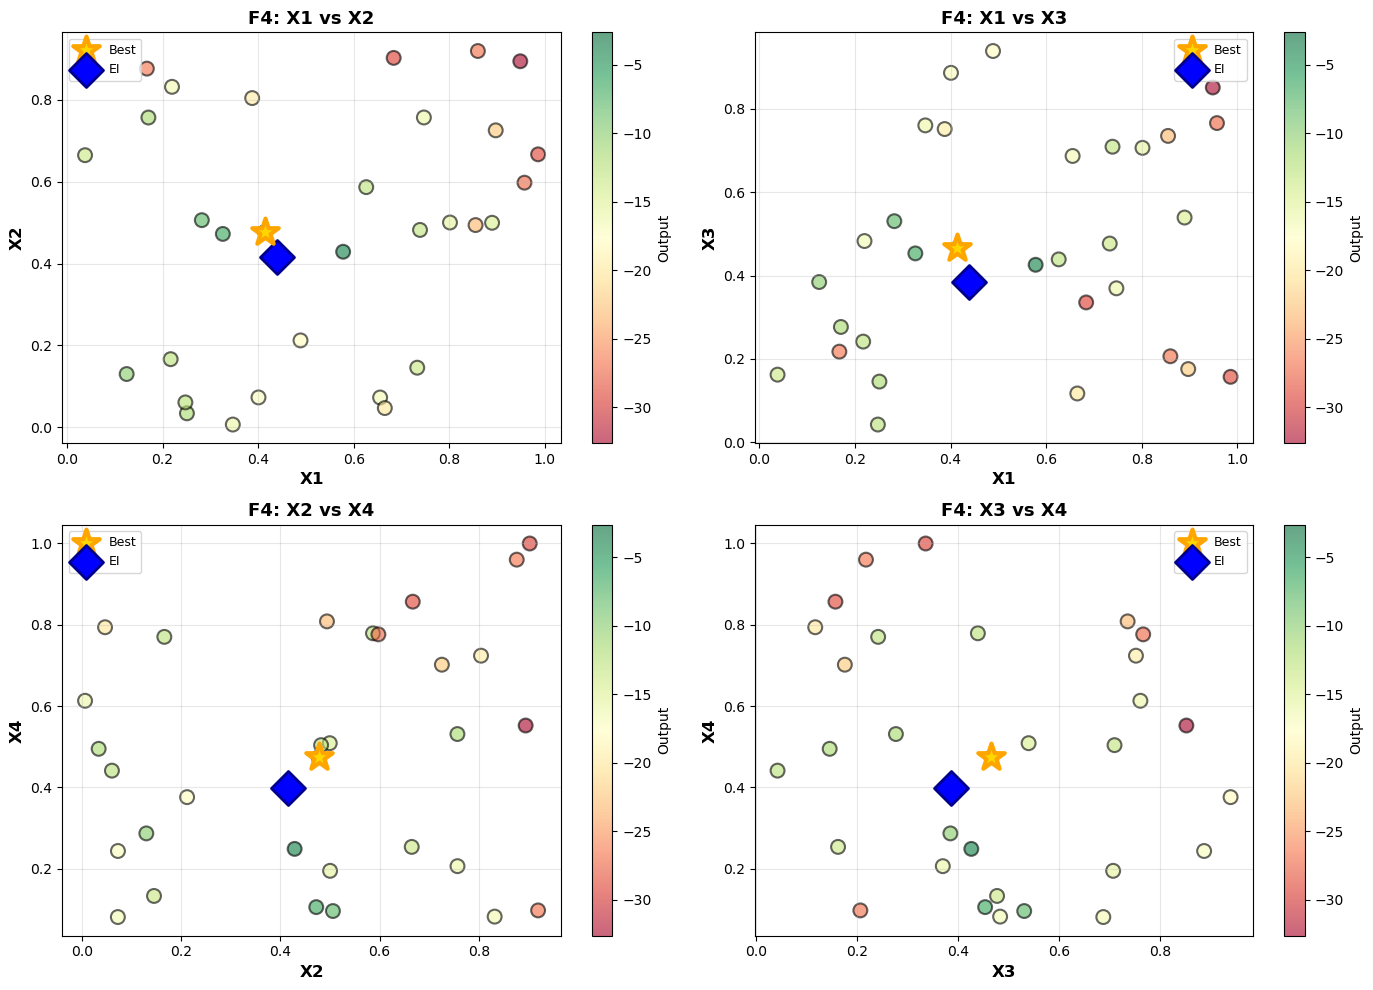

In [14]:
# Create 2D projections of 4D space
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

projections = [
    (0, 1, 'X1', 'X2'),
    (0, 2, 'X1', 'X3'),
    (1, 3, 'X2', 'X4'),
    (2, 3, 'X3', 'X4'),
]

for idx, (dim1, dim2, label1, label2) in enumerate(projections):
    ax = axes[idx // 2, idx % 2]
    scatter = ax.scatter(X[:, dim1], X[:, dim2], c=Y, cmap='RdYlGn', 
                        s=100, alpha=0.6, edgecolors='black', linewidth=1.5)
    ax.scatter(X[best_idx, dim1], X[best_idx, dim2],
              c='gold', s=400, marker='*', 
              edgecolors='orange', linewidth=3, label='Best', zorder=10)
    ax.scatter(x_next_ei[dim1], x_next_ei[dim2],
              c='blue', s=300, marker='D', 
              edgecolors='darkblue', linewidth=2, label='EI', zorder=9)
    
    ax.set_xlabel(label1, fontsize=12, fontweight='bold')
    ax.set_ylabel(label2, fontsize=12, fontweight='bold')
    ax.set_title(f'F4: {label1} vs {label2}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Output')

plt.tight_layout()
plt.show()

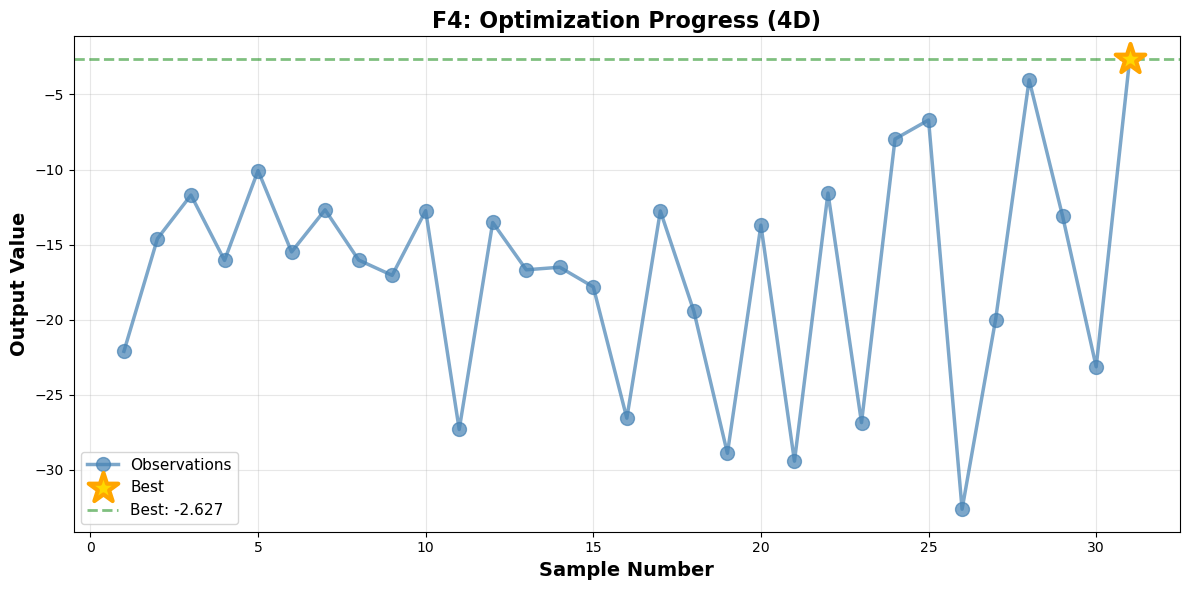

In [15]:
# Progress plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(range(1, len(Y)+1), Y, 'o-', linewidth=2.5, markersize=10, 
        color='steelblue', alpha=0.7, label='Observations')
ax.scatter(best_idx+1, Y[best_idx], c='gold', s=500, marker='*',
           edgecolors='orange', linewidth=3, label='Best', zorder=10)
ax.axhline(y=Y[best_idx], color='green', linestyle='--', linewidth=2,
           alpha=0.5, label=f'Best: {Y[best_idx]:.3f}')
ax.set_xlabel('Sample Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Output Value', fontsize=14, fontweight='bold')
ax.set_title('F4: Optimization Progress (4D)', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Section 7: Final Recommendation

In [16]:
print("\n" + "="*70)
print("🎯 FINAL RECOMMENDATION FOR F4 WEEK 2")
print("="*70)

print("\nCurrent Status:")
print(f"  Best value: {Y[best_idx]:.6f}")
print(f"  Best point: [{X[best_idx, 0]:.4f}, {X[best_idx, 1]:.4f}, {X[best_idx, 2]:.4f}, {X[best_idx, 3]:.4f}]")

print("\n⭐⭐⭐ RECOMMENDATION: Expected Improvement (EI)")
print(f"  Point: [{x_next_ei[0]:.6f}, {x_next_ei[1]:.6f}, {x_next_ei[2]:.6f}, {x_next_ei[3]:.6f}]")
print(f"  Predicted: {mu_ei[0]:.6f} ± {sigma_ei[0]:.6f}")
print(f"  WHY: Best for high-dimensional sparse data!")

print("\n🥈 Alternative: UCB (More exploratory)")
print(f"  Point: [{x_next_ucb[0]:.6f}, {x_next_ucb[1]:.6f}, {x_next_ucb[2]:.6f}, {x_next_ucb[3]:.6f}]")

if best_local_point:
    print("\n🥉 Alternative: Local Refinement (Conservative)")
    print(f"  Point: [{best_local_point[0]:.6f}, {best_local_point[1]:.6f}, {best_local_point[2]:.6f}, {best_local_point[3]:.6f}]")

print("\n" + "="*70)
print("4D Challenge: Trust the Bayesian Optimization!")
print("="*70)


🎯 FINAL RECOMMENDATION FOR F4 WEEK 2

Current Status:
  Best value: -2.627068
  Best point: [0.4141, 0.4771, 0.4657, 0.4741]

⭐⭐⭐ RECOMMENDATION: Expected Improvement (EI)
  Point: [0.439247, 0.414995, 0.384687, 0.397917]
  Predicted: -1.677777 ± 0.356982
  WHY: Best for high-dimensional sparse data!

🥈 Alternative: UCB (More exploratory)
  Point: [0.441275, 0.400273, 0.312748, 0.413822]

🥉 Alternative: Local Refinement (Conservative)
  Point: [0.414086, 0.477129, 0.415693, 0.474096]

4D Challenge: Trust the Bayesian Optimization!


## Section 8: Format Output for Submission

In [17]:
USE_EI = True  # Highly recommended for 4D!

if USE_EI:
    x_next = x_next_ei
    method_name = "Expected Improvement (EI)"
else:
    x_next = x_next_ucb
    method_name = "Upper Confidence Bound (UCB)"

print("\n" + "="*70)
print("QUERY SUBMISSION")
print("="*70)
print(f"Method: {method_name}")
print(f"Function 4 - Next point:")
print(f"  [{x_next[0]:.6f}, {x_next[1]:.6f}, {x_next[2]:.6f}, {x_next[3]:.6f}]")
print("="*70)


QUERY SUBMISSION
Method: Expected Improvement (EI)
Function 4 - Next point:
  [0.439247, 0.414995, 0.384687, 0.397917]
